In [3]:
!pip install xgboost

In [4]:
#loading basic dependencies
import numpy as np
import pandas as pd 
import math
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report , confusion_matrix
import matplotlib.pyplot as plt 
import seaborn as sns
data=pd.read_csv("employee_promotion.csv")
#getting first 5 rows
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [ ]:
data.describe()
data.describe(include="object")

In [ ]:
#getting shape of the data
data.shape

(54808, 14)

Class 0: 50140
Class 1: 4668
Proportion: 10.74 : 1


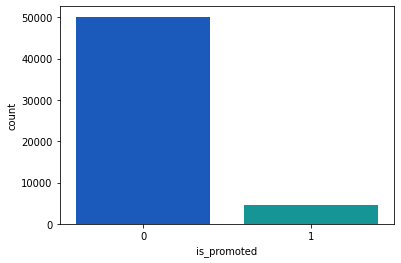

In [ ]:
#Getting class distrubtion 
target_class=data.is_promoted.value_counts()
print('Class 0:', target_class[0])
print('Class 1:', target_class[1])
print('Proportion:', round(target_class[0] / target_class[1], 2), ': 1')

sns.countplot('is_promoted', data=data, palette='winter');

In [ ]:
#checking null values
data.isnull().any()

employee_id             False
department              False
region                  False
education                True
gender                  False
recruitment_channel     False
no_of_trainings         False
age                     False
previous_year_rating     True
length_of_service       False
KPIs_met >80%           False
awards_won?             False
avg_training_score      False
is_promoted             False
dtype: bool

In [ ]:
#imputing the null values
data['education'].fillna("No Education", inplace = True)
data['previous_year_rating'].fillna(data['previous_year_rating'].mean(), inplace=True)

In [ ]:
#checking for null values after imputation
data.isnull().any().any()

False

In [ ]:
#Using label encoder for converting categorical values to numerical values
lb=LabelEncoder()
data['department']= lb.fit_transform(data['department'])
data['region']= lb.fit_transform(data['region'])
data['education']= lb.fit_transform(data['education'])
data['gender']= lb.fit_transform(data['gender'])
data['recruitment_channel']= lb.fit_transform(data['recruitment_channel'])

In [ ]:
#loading into X and y
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [ ]:
#Splitting dataset 
X_train,X_test, y_train, y_test=train_test_split(X,y, test_size=0.25, random_state=0)

# XGBOOST
XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements machine learning algorithms under the Gradient Boosting framework.
XGboost parameters for imbalance dataset.

* booster :
Which booster to use. Can be gbtree, gblinear or dart; gbtree and dart use tree based models while gblinear uses linear functions.

* eta :
Step size shrinkage used in update to prevents overfitting. After each boosting step, we can directly get the weights of new features, and eta shrinks the feature weights to make the boosting process more conservative.

* scale_pos_weight :
It is the ratio of number of negative class to the positive class.



In [ ]:
clf=XGBClassifier()
clf.fit(X_train,y_train)
y_predict=clf.predict(X_test)

[[12536    12]
 [  852   302]]


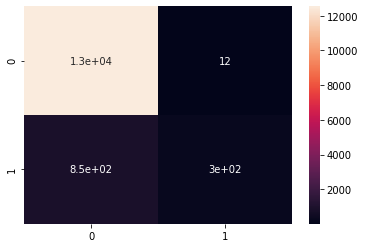

In [ ]:
#Confusion metrics
cm=confusion_matrix(y_test,y_predict)
print(cm)
sns.heatmap(cm, annot=True)

In [ ]:
#Accuracy and classification report
print(accuracy_score(y_test,y_predict))
print(classification_report(y_test,y_predict))

0.9369435118960736
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     12548
           1       0.96      0.26      0.41      1154

    accuracy                           0.94     13702
   macro avg       0.95      0.63      0.69     13702
weighted avg       0.94      0.94      0.92     13702



In [ ]:
#calculating scale_pos_weight
scale_pos_weight=math.sqrt(50140/4668)

In [ ]:
clf2=XGBClassifier(scale_pos_weight=scale_pos_weight)
clf2.fit(X_train,y_train)
y_predict2=clf2.predict(X_test)

[[12347   201]
 [  746   408]]


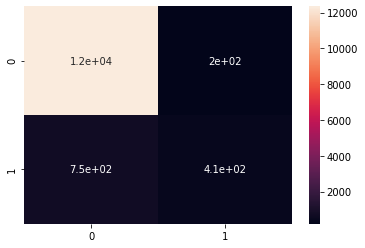

In [ ]:
#Confusion metrics
cm=confusion_matrix(y_test,y_predict2)
print(cm)
sns.heatmap(cm, annot=True)

In [ ]:
#Accuracy and classification report
print(accuracy_score(y_test,y_predict2))
print(classification_report(y_test,y_predict2))

0.9308860020434973
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     12548
           1       0.67      0.35      0.46      1154

    accuracy                           0.93     13702
   macro avg       0.81      0.67      0.71     13702
weighted avg       0.92      0.93      0.92     13702

